## Credit Classification from LendingClub.com 

Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. I will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

You can download the data from <a href="https://www.lendingclub.com/investing/peer-to-peer" target="_blank">here</a>.

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

In [4]:
#loading data and showing the first five rows
df = pd.read_csv('data/loan_data.csv')
loan_df = df
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loan_df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### Here are what the columns represent:

***
* **credit.policy**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
***
* **purpose**: The purpose of the loan (takes values "creditcard", "debtconsolidation", "educational", "majorpurchase", "smallbusiness", and "all_other").
***
* **int.rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
***
* **installment**: The monthly installments owed by the borrower if the loan is funded.
***
* **log.annual.inc**: The natural log of the self-reported annual income of the borrower.
***
* **dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
***
* **fico**: The FICO credit score of the borrower.
***
* **days.with.cr.line**: The number of days the borrower has had a credit line.
***
* **revol.bal**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
***
* **revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
***
* **inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.
***
* **delinq.2yrs**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
***
* **pub.rec**: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).
***

# Data pre-processing

In [6]:
loan_df.shape

(9578, 14)

In [7]:
loan_df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [8]:
loan_df.columns = [c.replace('.', '_') for c in loan_df.columns]

In [9]:
loan_df = pd.get_dummies(loan_df,prefix='purpose',drop_first=True)

In [10]:
loan_df['not_fully_paid'].value_counts()

0    8045
1    1533
Name: not_fully_paid, dtype: int64

The dataset is imbalanced and needs to be modified so there are balanced number of samples in each class. 4 methods will be implemented in this code to evaluate and compare different strategies for handling imbalanced dataset.

# Exploratory Data Analysis

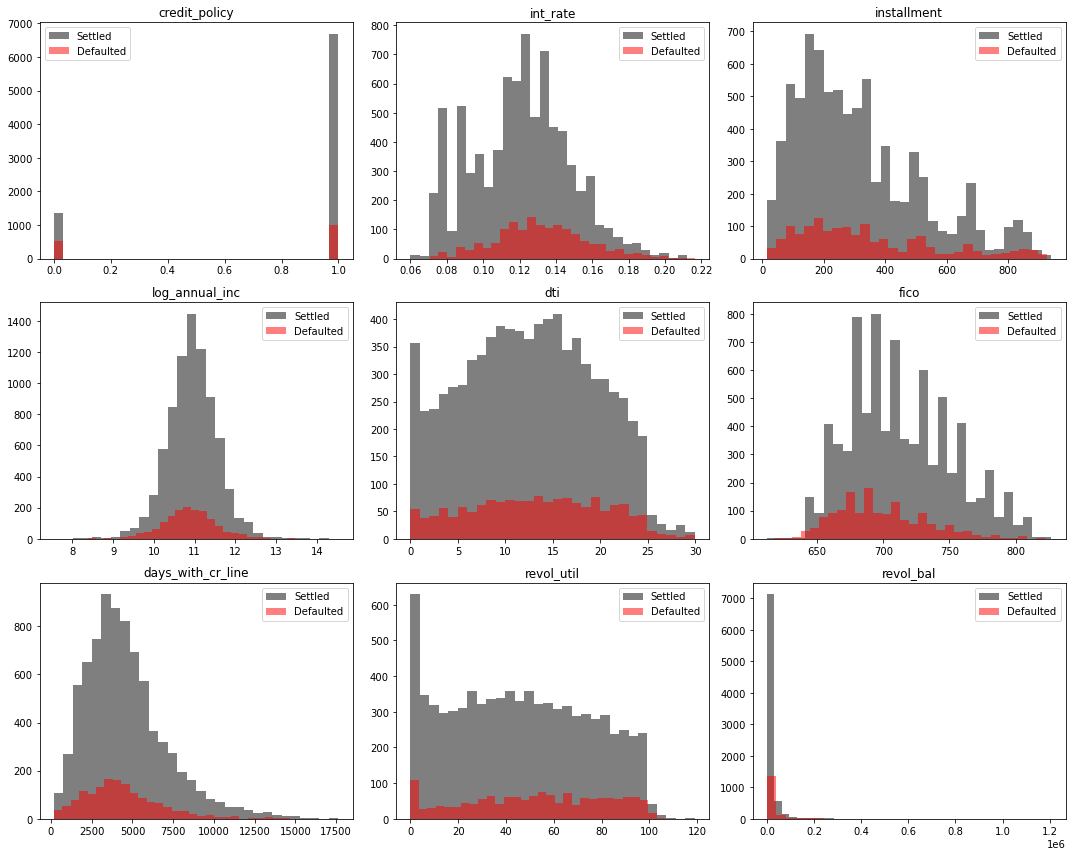

In [11]:
features_to_plot = ['credit_policy', 'int_rate', 'installment', 'log_annual_inc', 'dti',
            'fico', 'days_with_cr_line', 'revol_util', 'revol_bal']

fig, axes = plt.subplots(int(len(features_to_plot)/3),3, figsize=(15, 12))
axes = axes.ravel()

for ax in axes:
    ax.set_axis_off()
    
for i in range(len(features_to_plot)):
    
    axes[i].hist(loan_df[loan_df['not_fully_paid']==0][features_to_plot[i]], alpha=0.5, color='black', bins=30, label='Settled')
    axes[i].hist(loan_df[loan_df['not_fully_paid']==1][features_to_plot[i]], alpha=0.5, color='red', bins=30, label='Defaulted')    
    axes[i].legend(prop={'size': 10})
    axes[i].set_title(str(features_to_plot[i]))
    axes[i].set_axis_on()
 

fig.tight_layout()
plt.show()

It seems that most of the features follow a normal distribution, except for revol_bal. To fix this, we should apply a log formula.

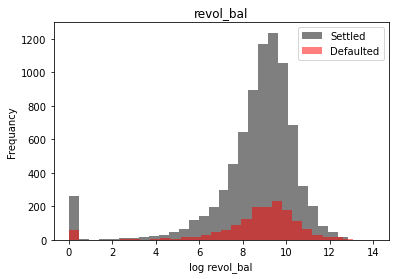

In [12]:
plt.hist(np.log(loan_df[loan_df['not_fully_paid']==0]['revol_bal'] + 1), alpha=0.5, color='black', bins=30, label='Settled')
plt.hist(np.log(loan_df[loan_df['not_fully_paid']==1]['revol_bal'] + 1), alpha=0.5, color='red', bins=30, label='Defaulted')    
plt.legend(prop={'size': 10})
plt.title('revol_bal')
plt.xlabel('log revol_bal')
plt.ylabel('Frequancy')
plt.show()

loan_df['revol_bal_log'] = np.log(loan_df.revol_bal + 1)

In [13]:
loan_df = loan_df.drop('revol_bal', axis = 1)

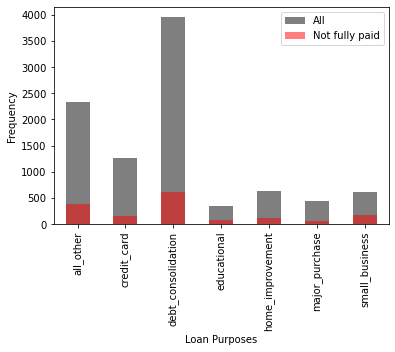

In [14]:
df.groupby('purpose')['not_fully_paid'].count().plot(kind='bar', color='black', alpha=0.5, label = 'All')
df.groupby('purpose')['not_fully_paid'].sum().plot(kind='bar', color='red', alpha=0.5, label = 'Not fully paid')
plt.rcParams["figure.figsize"] = (10,6)
plt.xlabel('Loan Purposes')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Neural Network Classification

In [15]:
def ANN(train_features, test_features, train_targets, test_targets, loss):
    model = Sequential()
    model.add(Dense(100, input_dim=train_features.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(50, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(20, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(1, activation='sigmoid'))

    # Fit the model
    model.compile(optimizer='adam', loss = loss, metrics = 'accuracy')
    history = model.fit(train_features, train_targets, epochs = 400, verbose = 0)
    
    test_preds = model.predict(test_features)
    test_preds_mapped = np.where(test_preds > 0.5, 1, 0)
    
    print('\nThe confusion matris is: \n')
    print(confusion_matrix(test_targets, test_preds_mapped))
    print('\nThe classification report is: \n')
    print(classification_report(test_targets, test_preds_mapped))
    
    return test_preds

# Evaluating the model based on an unbalanced training set

## Feature Scaling and Dataset Spliting (unbalanced)

In [16]:
class_0 = loan_df[loan_df['not_fully_paid'] == 0]
class_1 = loan_df[loan_df['not_fully_paid'] == 1]

In [17]:
class_0.shape, class_1.shape

((8045, 19), (1533, 19))

In [18]:
X = loan_df.drop('not_fully_paid', axis = 1)
y = loan_df['not_fully_paid']

train_features, test_features, train_targets, test_targets = train_test_split(X, y, test_size=0.33, stratify = y, random_state=42)
scale = StandardScaler()
scale.fit(train_features)
train_features = scale.transform(train_features)
test_features = scale.transform(test_features)

In [19]:
train_targets.value_counts()

0    5390
1    1027
Name: not_fully_paid, dtype: int64

In [20]:
test_preds = ANN(train_features, test_features, train_targets, test_targets, 'binary_crossentropy')

F1-score for event = 1 is low and it needs to be improved. The skewed dataset is the reason behind the difference between F1-score of two classes. 

# Evaluating the model based on the balanced dataset

## Approach 1 :  Undersampling majority class

In [ ]:
X = loan_df.drop('not_fully_paid', axis = 1)
y = loan_df['not_fully_paid']
train_features, test_features, train_targets, test_targets = train_test_split(X, y, test_size=0.33, stratify = y, random_state=42)

In [ ]:
train_targets.value_counts()

0    5390
1    1027
Name: not_fully_paid, dtype: int64

In [ ]:
train_set = train_features.copy()
train_set['not_fully_paid'] = train_targets
class_0 = train_set[train_set['not_fully_paid'] == 0]
class_1 = train_set[train_set['not_fully_paid'] == 1]

class_0_undersample = class_0.sample(class_1.shape[0])
loan_df_undersample = pd.concat([class_0_undersample, class_1], axis = 0)

In [ ]:
class_0_undersample.shape, class_1.shape, loan_df_undersample.shape

((1027, 19), (1027, 19), (2054, 19))

In [ ]:
train_features = loan_df_undersample.drop('not_fully_paid', axis = 1)
train_targets = loan_df_undersample['not_fully_paid']

scale = StandardScaler()
scale.fit(train_features)
train_features = scale.transform(train_features)
test_features = scale.transform(test_features)

In [ ]:
train_targets.value_counts()

0    1027
1    1027
Name: not_fully_paid, dtype: int64

In [ ]:
test_targets.value_counts()

0    2655
1     506
Name: not_fully_paid, dtype: int64

In [ ]:
train_preds = ANN(train_features, test_features, train_targets, test_targets, 'binary_crossentropy')


The confusion matris is: 

[[1806  849]
 [ 248  258]]

The classification report is: 

              precision    recall  f1-score   support

           0       0.88      0.68      0.77      2655
           1       0.23      0.51      0.32       506

    accuracy                           0.65      3161
   macro avg       0.56      0.60      0.54      3161
weighted avg       0.78      0.65      0.70      3161



## Approach 2 :  Oversampling minority class by duplication

In [ ]:
X = loan_df.drop('not_fully_paid', axis = 1)
y = loan_df['not_fully_paid']
train_features, test_features, train_targets, test_targets = train_test_split(X, y, test_size=0.33, stratify = y, random_state=42)

In [ ]:
train_targets.value_counts()

0    5390
1    1027
Name: not_fully_paid, dtype: int64

In [ ]:
train_set = train_features.copy()
train_set['not_fully_paid'] = train_targets
class_0 = train_set[train_set['not_fully_paid'] == 0]
class_1 = train_set[train_set['not_fully_paid'] == 1]

class_1_oversample = class_1.sample(class_0.shape[0], replace = True)
loan_df_oversample = pd.concat([class_0, class_1_oversample], axis = 0)

In [ ]:
train_features = loan_df_oversample.drop('not_fully_paid', axis = 1)
train_targets = loan_df_oversample['not_fully_paid']

scale = StandardScaler()
scale.fit(train_features)
train_features = scale.transform(train_features)
test_features = scale.transform(test_features)

In [ ]:
train_targets.value_counts()

0    5390
1    5390
Name: not_fully_paid, dtype: int64

In [ ]:
test_targets.value_counts()

0    2655
1     506
Name: not_fully_paid, dtype: int64

In [ ]:
train_preds = ANN(train_features, test_features, train_targets, test_targets, 'binary_crossentropy')


The confusion matris is: 

[[1973  682]
 [ 302  204]]

The classification report is: 

              precision    recall  f1-score   support

           0       0.87      0.74      0.80      2655
           1       0.23      0.40      0.29       506

    accuracy                           0.69      3161
   macro avg       0.55      0.57      0.55      3161
weighted avg       0.77      0.69      0.72      3161



## Approach 3 :  SMOTE

In [ ]:
X = loan_df.drop('not_fully_paid', axis = 1)
y = loan_df['not_fully_paid']

In [ ]:
train_features, test_features, train_targets, test_targets = train_test_split(X, y, test_size=0.33, stratify = y, random_state=42)
train_set = train_features.copy()
train_set['not_fully_paid'] = train_targets

X = train_set.drop('not_fully_paid', axis = 1)
y = train_set['not_fully_paid']

In [ ]:
smote = SMOTE(sampling_strategy='minority')

In [ ]:
train_features, train_targets = smote.fit_resample(X,y)

In [ ]:
train_targets.value_counts()

0    5390
1    5390
Name: not_fully_paid, dtype: int64

In [ ]:
scale = StandardScaler()
scale.fit(train_features)
train_features = scale.transform(train_features)
test_features = scale.transform(test_features)

In [ ]:
train_preds = ANN(train_features, test_features, train_targets, test_targets, 'binary_crossentropy')


The confusion matris is: 

[[2249  406]
 [ 382  124]]

The classification report is: 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      2655
           1       0.23      0.25      0.24       506

    accuracy                           0.75      3161
   macro avg       0.54      0.55      0.55      3161
weighted avg       0.76      0.75      0.75      3161



## Approach 4 :  Use of Ensemble with undersampling 

In [ ]:
def get_batch(majority_class, minority_class, start, end):
    loan_df_ensembeled = pd.concat([majority_class[start:end], minority_class], axis = 0)
    train_features = loan_df_ensembeled.drop('not_fully_paid', axis = 1)
    train_targets = loan_df_ensembeled['not_fully_paid']
                                
    return train_features, train_targets

In [ ]:
X = loan_df.drop('not_fully_paid', axis = 1)
y = loan_df['not_fully_paid']
train_features, test_features, train_targets, test_targets = train_test_split(X, y, test_size=0.33, stratify = y, random_state=42)

train_set = train_features.copy()
train_set['not_fully_paid'] = train_targets

majority_class = train_set[train_set['not_fully_paid'] == 0]
minority_class = train_set[train_set['not_fully_paid'] == 1]

In [ ]:
majority_class.shape, minority_class.shape

((5390, 19), (1027, 19))

In [ ]:
test_preds_dict = {}
for i in range(1,6):
    train_features, train_targets = get_batch(majority_class, minority_class, (i-1) * 1027, i * 1027)
    scale = StandardScaler()
    scale.fit(train_features)
    train_features = scale.transform(train_features)
    test_features = scale.transform(test_features)
    test_preds_dict[i] = ANN(train_features, test_features, train_targets, test_targets, 'binary_crossentropy')   

train_features, train_targets = get_batch(majority_class, minority_class.sample(5390 - 5 * 1027), (5) * 1027, 5390)
scale = StandardScaler()
scale.fit(train_features)
train_features = scale.transform(train_features)
test_features = scale.transform(test_features)
test_preds_dict[6] = ANN(train_features, test_features, train_targets, test_targets, 'binary_crossentropy')


The confusion matris is: 

[[1458 1197]
 [ 200  306]]

The classification report is: 

              precision    recall  f1-score   support

           0       0.88      0.55      0.68      2655
           1       0.20      0.60      0.30       506

    accuracy                           0.56      3161
   macro avg       0.54      0.58      0.49      3161
weighted avg       0.77      0.56      0.62      3161


The confusion matris is: 

[[ 220 2435]
 [  15  491]]

The classification report is: 

              precision    recall  f1-score   support

           0       0.94      0.08      0.15      2655
           1       0.17      0.97      0.29       506

    accuracy                           0.22      3161
   macro avg       0.55      0.53      0.22      3161
weighted avg       0.81      0.22      0.17      3161


The confusion matris is: 

[[2581   74]
 [ 490   16]]

The classification report is: 

              precision    recall  f1-score   support

           0       0.84    

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



The confusion matris is: 

[[1687  968]
 [ 254  252]]

The classification report is: 

              precision    recall  f1-score   support

           0       0.87      0.64      0.73      2655
           1       0.21      0.50      0.29       506

    accuracy                           0.61      3161
   macro avg       0.54      0.57      0.51      3161
weighted avg       0.76      0.61      0.66      3161


The confusion matris is: 

[[   0 2655]
 [   0  506]]

The classification report is: 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2655
           1       0.16      1.00      0.28       506

    accuracy                           0.16      3161
   macro avg       0.08      0.50      0.14      3161
weighted avg       0.03      0.16      0.04      3161



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
test_preds = test_preds_dict[1] + test_preds_dict[2] + test_preds_dict[3] + test_preds_dict[4] + test_preds_dict[5] + test_preds_dict[6] 
test_preds = test_preds / 6

In [ ]:
test_preds_mapped = np.where(test_preds > 0.5, 1, 0)

print('\nThe confusion matris is: \n')
print(confusion_matrix(test_targets, test_preds_mapped))
print('\nThe classification report is: \n')
print(classification_report(test_targets, test_preds_mapped))


The confusion matris is: 

[[1697  958]
 [ 256  250]]

The classification report is: 

              precision    recall  f1-score   support

           0       0.87      0.64      0.74      2655
           1       0.21      0.49      0.29       506

    accuracy                           0.62      3161
   macro avg       0.54      0.57      0.51      3161
weighted avg       0.76      0.62      0.67      3161



# Conclusion: 


the dataset is unbalanced and as a result the precision of event = 1 is low. To tackle this problem four different methods including undersampling, oversampling, SMOTE, and ensemble method with undersampling were implemented. Amoung these approaches, oversampling is the promising method.